# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 24.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.1.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [5]:
# # connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# read the data from csv into a dataframe called food_hub
food_hub = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [7]:
# view the first 5 rows
food_hub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [8]:
# Get the dimensions (number of rows and columns) of the 'food_hub' dataframe
food_hub.shape

(1898, 9)

#### Observations:
rows = 1898
columns = 9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [9]:
# Display a concise summary of the 'food_hub' dataframe
food_hub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
|Column                |Data type  
|------                |-----  
|order_id              |int64  
|customer_id           |int64  
|restaurant_name       |object
|cuisine_type          |object
|cost_of_the_order     |float64
|day_of_the_week       |object
|rating                |object
|food_preparation_time |int64  
|delivery_time         |int64

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [10]:
# Check for missing (null) values in the 'food_hub' DataFrame for each column
food_hub.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
No missing value

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
# Display statistical summary for the 'food_preparation_time' column in the 'food_hub' dataframe
food_hub['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations:
minimum = 20.000000\
average = 27.371970\
maximum = 35.000000

### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
# Count the occurrences of each unique value in the 'rating' column of the 'food_hub' dataframe
rating_counts = food_hub["rating"].value_counts()

# Print the count of each unique rating value
print(rating_counts)

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


#### Observations:
orders are not rated = 736

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

***Univariate Analysis for cost_of_the_order***


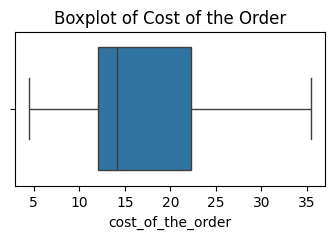

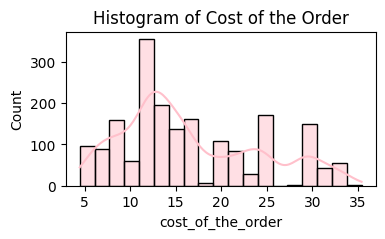

Observation:
 Central Tendency:
  Mean: 16.498851422550054
  Median: 14.14
  Standard Deviation: 7.483812110049553
 Dispersion:
  Minimum: 4.47
  Maximum: 35.41
 Distribution:
  The distribution is right-skewed, indicating fewer high-cost orders.
  Most orders are in the range of $10 to $20


In [101]:
# --- Univariate Analysis for cost_of_the_order ---
print('***Univariate Analysis for cost_of_the_order***')

# Calculate central tendency and dispersion metrics for the 'cost_of_the_order' column
mean_value = food_hub['cost_of_the_order'].mean()  # Mean (average) cost
median_value = food_hub['cost_of_the_order'].median()  # Median (middle value) cost
minimum_value = food_hub['cost_of_the_order'].min()  # Minimum cost
maximum_value = food_hub['cost_of_the_order'].max()  # Maximum cost
std_dev = food_hub['cost_of_the_order'].std()  # Standard deviation (spread of data)

# Boxplot to visualize the distribution and identify outliers
plt.figure(figsize=(4, 2))
sns.boxplot(x=food_hub['cost_of_the_order'])
plt.title("Boxplot of Cost of the Order")
plt.show()

# Histogram to visualize the frequency distribution of costs
plt.figure(figsize=(4, 2))
sns.histplot(food_hub['cost_of_the_order'], kde=True, color= 'pink')  # kde=True adds a density curve
plt.title("Histogram of Cost of the Order")
plt.show()

# Print observations
print('Observation:')
print(' Central Tendency:')
print(f'  Mean: {mean_value}')  # Average cost
print(f'  Median: {median_value}')  # Middle value of costs
print(f'  Standard Deviation: {std_dev}')  # Spread of costs
print(' Dispersion:')
print(f'  Minimum: {minimum_value}')  # Lowest cost
print(f'  Maximum: {maximum_value}')  # Highest cost
print(' Distribution:')
print('  The distribution is right-skewed, indicating fewer high-cost orders.')
print('  Most orders are in the range of $10 to $20')


 ***Univariate Analysis for food_preparation_time***


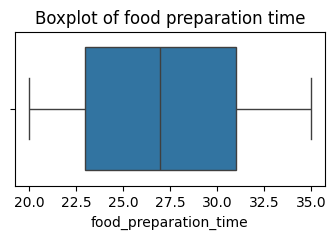

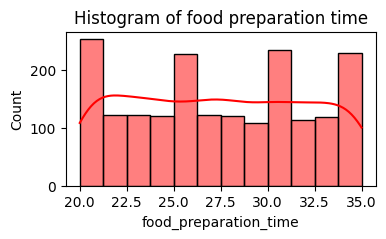

Observation:
 Central Tendency:
  Mean: 27.371970495258168
  Median: 27.0
  Standard Deviation: 4.63248077592887
 Dispersion:
  Minimum: 20
  Maximum: 35
 Distribution:
  The distribution is approximately uniform.
  Most orders are prepared in the range of 23 min to 31 min


In [104]:

# --- Univariate Analysis for food_preparation_time ---
print('\n ***Univariate Analysis for food_preparation_time***')

# Calculate central tendency and dispersion metrics for the 'food_preparation_time' column
mean_value = food_hub['food_preparation_time'].mean()  # Mean preparation time
median_value = food_hub['food_preparation_time'].median()  # Median preparation time
minimum_value = food_hub['food_preparation_time'].min()  # Minimum preparation time
maximum_value = food_hub['food_preparation_time'].max()  # Maximum preparation time
std_dev = food_hub['food_preparation_time'].std()  # Standard deviation

# Boxplot to visualize the distribution and identify outliers
plt.figure(figsize=(4, 2))
sns.boxplot(x=food_hub['food_preparation_time'])
plt.title("Boxplot of food preparation time")
plt.show()

# Histogram to visualize the frequency distribution of preparation times
plt.figure(figsize=(4, 2))
sns.histplot(food_hub['food_preparation_time'], kde=True, color= 'Red')  # kde=True adds a density curve
plt.title("Histogram of food preparation time")
plt.show()

# Print observations
print('Observation:')
print(' Central Tendency:')
print(f'  Mean: {mean_value}')  # Average preparation time
print(f'  Median: {median_value}')  # Middle value of preparation times
print(f'  Standard Deviation: {std_dev}')  # Spread of preparation times
print(' Dispersion:')
print(f'  Minimum: {minimum_value}')  # Lowest preparation time
print(f'  Maximum: {maximum_value}')  # Highest preparation time
print(' Distribution:')
print('  The distribution is approximately uniform.')
print('  Most orders are prepared in the range of 23 min to 31 min')


 ***Univariate Analysis for delivery_time***


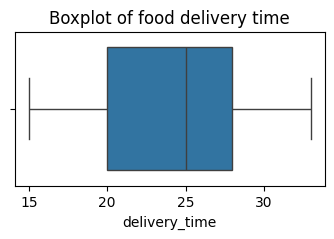

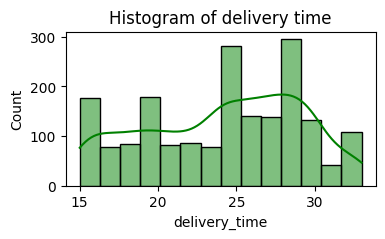

Observation:
 Central Tendency:
  Mean: 24.161749209694417
  Median: 25.0
  Standard Deviation: 4.972636933991107
 Dispersion:
  Minimum: 15
  Maximum: 33
 Distribution:
   Approximately normal with a small tail at higher times
   Most orders are delivered between 20–28 minutes


In [106]:
# --- Univariate Analysis for delivery_time ---
print('\n ***Univariate Analysis for delivery_time***')

# Calculate central tendency and dispersion metrics for the 'delivery_time' column
mean_value = food_hub['delivery_time'].mean()  # Mean delivery time
median_value = food_hub['delivery_time'].median()  # Median delivery time
minimum_value = food_hub['delivery_time'].min()  # Minimum delivery time
maximum_value = food_hub['delivery_time'].max()  # Maximum delivery time
std_dev = food_hub['delivery_time'].std()  # Standard deviation

# Boxplot to visualize the distribution and identify outliers
plt.figure(figsize=(4, 2))
sns.boxplot(x=food_hub['delivery_time'])
plt.title("Boxplot of food delivery time")
plt.show()

# Histogram to visualize the frequency distribution of delivery times
plt.figure(figsize=(4, 2))
sns.histplot(food_hub['delivery_time'], kde=True, color= 'green')  # kde=True adds a density curve
plt.title("Histogram of delivery time")
plt.show()

# Print observations
print('Observation:')
print(' Central Tendency:')
print(f'  Mean: {mean_value}')  # Average delivery time
print(f'  Median: {median_value}')  # Middle value of delivery times
print(f'  Standard Deviation: {std_dev}')  # Spread of delivery times
print(' Dispersion:')
print(f'  Minimum: {minimum_value}')  # Lowest delivery time
print(f'  Maximum: {maximum_value}')  # Highest delivery time
print(' Distribution:')
print('   Approximately normal with a small tail at higher times')
print('   Most orders are delivered between 20–28 minutes')


 ***Univariate Analysis for day_of_the_week***


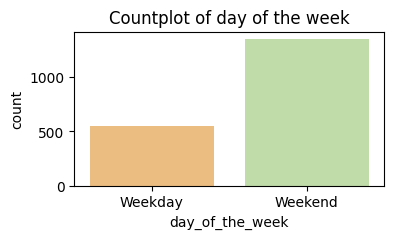

 Observation:
  1351 orders are placed on Weekends, which is significantly more than 547 orders placed on Weekdays


In [119]:
# --- Univariate Analysis for day_of_the_week ---
print('\n ***Univariate Analysis for day_of_the_week***')

# Countplot to visualize the frequency of orders on weekdays vs weekends
plt.figure(figsize=(4, 2))
sns.countplot(x=food_hub['day_of_the_week'],hue=food_hub['day_of_the_week'], palette='Spectral')
plt.title("Countplot of day of the week")
plt.show()

# Print observations
print(' Observation:')
print('  1351 orders are placed on Weekends, which is significantly more than 547 orders placed on Weekdays')


 ***Univariate Analysis for cuisine_type***


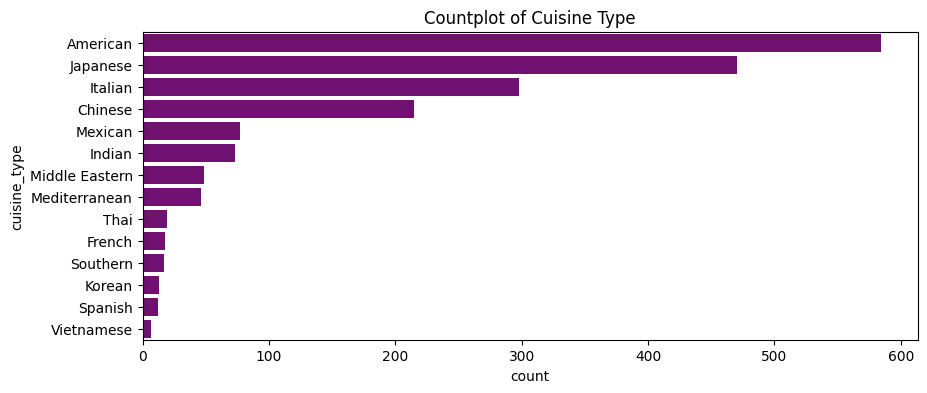

 Observation:
  Most ordered cuisine is American (584 orders), followed by Japanese, Italian, and Chinese. Least ordered cuisines are Korean, Spanish, Vietnamese.


In [113]:
# --- Univariate Analysis for cuisine_type ---
print('\n ***Univariate Analysis for cuisine_type***')

# Countplot to visualize the frequency of orders for each cuisine type
plt.figure(figsize=(10, 4))
sns.countplot(y=food_hub['cuisine_type'], order=food_hub['cuisine_type'].value_counts().index, color='purple')
plt.title("Countplot of Cuisine Type")
plt.show()

# Print observations
print(' Observation:')
print('  Most ordered cuisine is American (584 orders), followed by Japanese, Italian, and Chinese. Least ordered cuisines are Korean, Spanish, Vietnamese.')



 ***Univariate Analysis for rating***


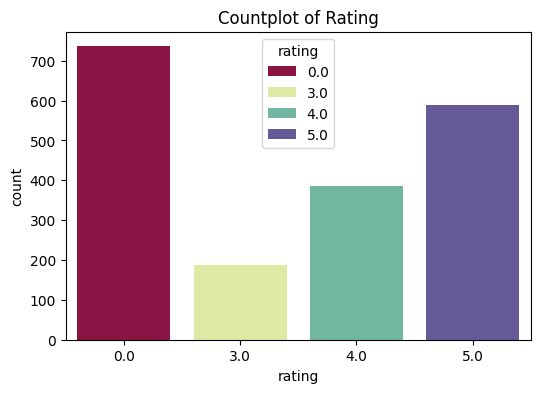

 Observation:
  A large number of orders are not rated (736 orders). Among the rated orders, 5 is the most common rating.


In [118]:
# --- Univariate Analysis for rating ---
print('\n ***Univariate Analysis for rating***')

# Countplot to visualize the frequency of each rating
plt.figure(figsize=(6, 4))
sns.countplot(x=food_hub['rating'] ,hue=food_hub['rating'], palette='Spectral')
plt.title("Countplot of Rating")
plt.show()

# Print observations
print(' Observation:')
print('  A large number of orders are not rated (736 orders). Among the rated orders, 5 is the most common rating.')

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [19]:
# Group the data by 'restaurant_name' and count the number of orders ('order_id') for each restaurant
# and select the top 5 restaurants with the highest number of orders
top_five_restaurants = food_hub.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).head(5)

# Print the top 5 restaurants and their respective order counts
print(top_five_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: order_id, dtype: int64


#### Observations:
Shake Shack:219   
The Meatball Shop: 132  
Blue Ribbon Sushi: 119  
Blue Ribbon Fried Chicken: 96  
Parm: 68  

\### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [20]:
# Filter the dataset to include only orders placed on weekends and store in a new dataframe 'weekend_order'
weekend_order = food_hub[food_hub['day_of_the_week'] == 'Weekend']

# Count the number of orders for each cuisine type in the weekend orders and
# select the top row, which is the cuisine type with the highest number of orders
most_ordered_cuisine = weekend_order['cuisine_type'].value_counts().head(1)

# Print the most ordered cuisine type on weekends
print(most_ordered_cuisine)

cuisine_type
American    415
Name: count, dtype: int64


#### Observations:
Most popular cuisine type on Weekends is American	with 415 order.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [21]:
# Filter the dataset to include only orders where the cost is greater than $20
# and using shape[0] get number of rows in the filtered DataFrame
order_more_than_20 = food_hub[food_hub['cost_of_the_order'] > 20].shape[0]

# Get the total number of orders in the dataset
total_order = food_hub.shape[0]

# Calculate the percentage of orders that cost more than $20
percentage_orders_more_than_20 = (order_more_than_20 / total_order) * 100

# Print the calculated percentage
print(percentage_orders_more_than_20)


29.24130663856691


#### Observations:
Approximately 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [22]:
# Calculate the mean of the 'delivery_time' column in the 'food_hub' dataframe
mean_delivery_time = food_hub['delivery_time'].mean()

# Print the calculated mean delivery time
print(mean_delivery_time)

24.161749209694417


#### Observations:
Approximately 24.16 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
# Group the data by 'customer_id' and count the number of orders ('order_id') for each customer
# and select the top 3 customers with the highest number of orders
customer_order = food_hub.groupby('customer_id')['order_id'].count().sort_values(ascending=False).head(3)

# Print the top 3 customers and their respective order counts
print(customer_order)

customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


#### Observations:
Top three frequent customers are 52832, 47440, 83287


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


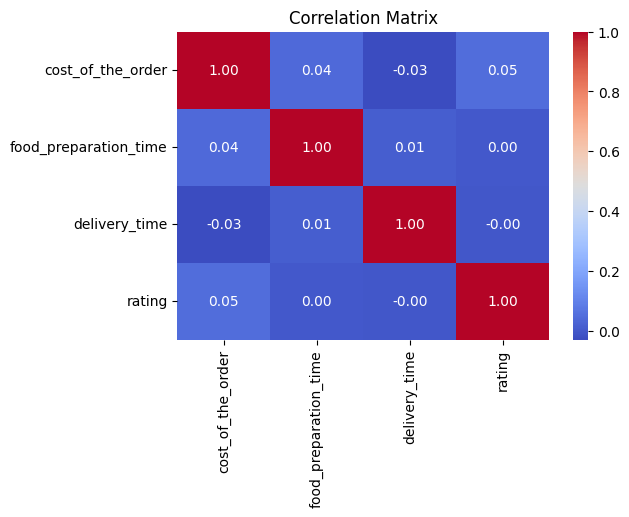

Observations from the Correlation Matrix Heatmap:
1. Cost of the Order:
   - Very weak positive correlation with food preparation time (0.04).
   - Very weak negative correlation with delivery time (-0.03).
   - Very weak positive correlation with rating (0.05).
2. Food Preparation Time:
   - Very weak positive correlation with cost of the order (0.04).
   - Almost no correlation with delivery time (0.01).
3. Delivery Time:
   - Very weak negative correlation with cost of the order (-0.03).
   - Almost no correlation with food preparation time (0.01).
   - Almost no correlation with rating (-0.00).
4. Rating:
   - Very weak positive correlation with cost of the order (0.05).

 Overall, the correlations between these variables are very weak,
 indicating that there is little to no linear relationship between them.



In [25]:
# Convert day_of_the_week and cuisine_type into categorical variables.
food_hub['day_of_the_week'] = food_hub['day_of_the_week'].astype('category')
food_hub['cuisine_type'] = food_hub['cuisine_type'].astype('category')

# Replace 'Not given' with 0 and convert to float
food_hub['rating'] = food_hub['rating'].replace('Not given', 0).astype(float)

# Calculate the correlation matrix for numerical variables
corr_matrix  = food_hub[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix , annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print("Observations from the Correlation Matrix Heatmap:")

print("1. Cost of the Order:")
print("   - Very weak positive correlation with food preparation time (0.04).")
print("   - Very weak negative correlation with delivery time (-0.03).")
print("   - Very weak positive correlation with rating (0.05).")

print("2. Food Preparation Time:")
print("   - Very weak positive correlation with cost of the order (0.04).")
print("   - Almost no correlation with delivery time (0.01).")

print("3. Delivery Time:")
print("   - Very weak negative correlation with cost of the order (-0.03).")
print("   - Almost no correlation with food preparation time (0.01).")
print("   - Almost no correlation with rating (-0.00).")

print("4. Rating:")
print("   - Very weak positive correlation with cost of the order (0.05).")

print("\n Overall, the correlations between these variables are very weak,\n indicating that there is little to no linear relationship between them.\n")

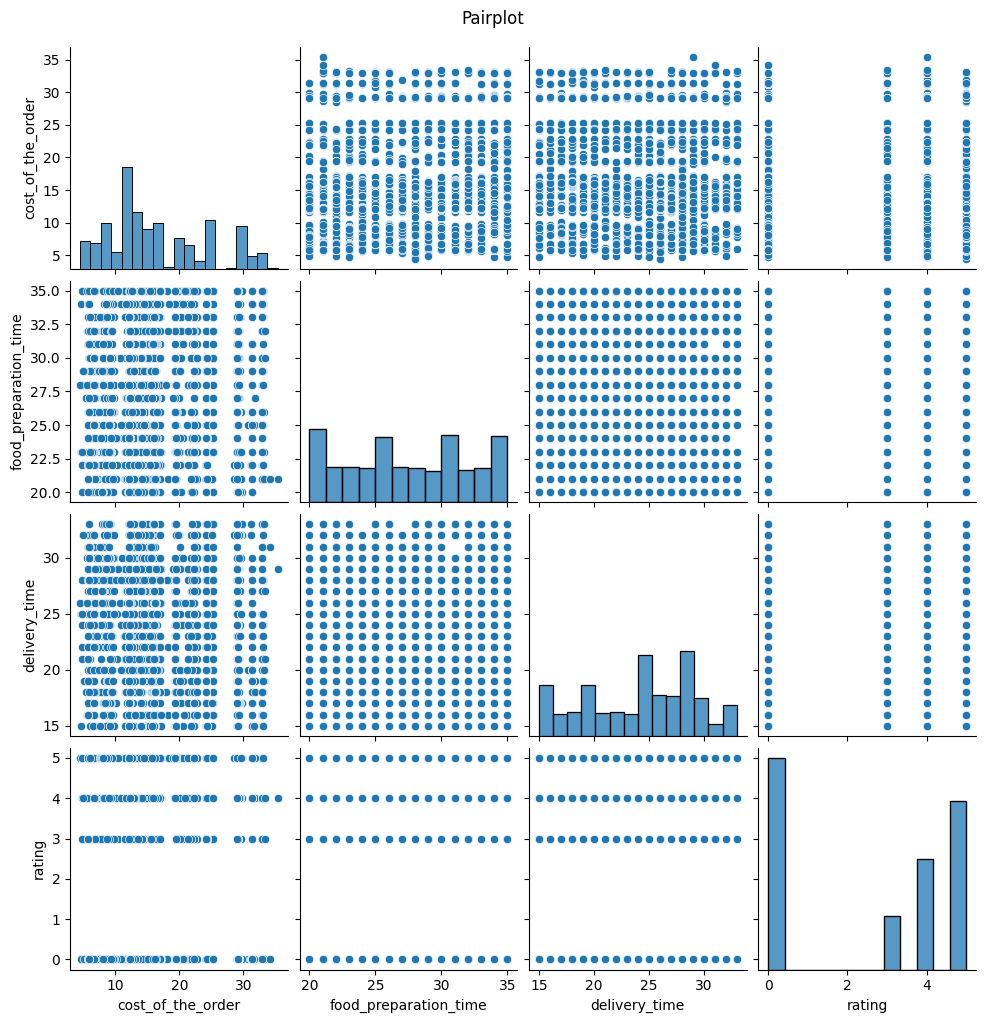


Observations from the Pairplot:
 - Relationship between cost, rating, food preparation time, and delivery time have limited linear correlation
 - Ratings shows widely dispersed pattern with no trends with Cost of the Order, Food Preparation Time,  Delivery Time
 - Both food preparation time and delivery time are uniformly distributed, with no significant outliers or trends.
 - Similarly preparation time and cost show no particular trend



In [86]:
# Create a pairplot to visualize pairwise relationships between numerical variables
sns.pairplot(food_hub[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']])
plt.suptitle("Pairplot", y=1.02)
plt.show()

print("\nObservations from the Pairplot:")
print(' - Relationship between cost, rating, food preparation time, and delivery time have limited linear correlation')
print(' - Ratings shows widely dispersed pattern with no trends with Cost of the Order, Food Preparation Time,  Delivery Time')
print(' - Both food preparation time and delivery time are uniformly distributed, with no significant outliers or trends.')
print(' - Similarly preparation time and cost show no particular trend\n')

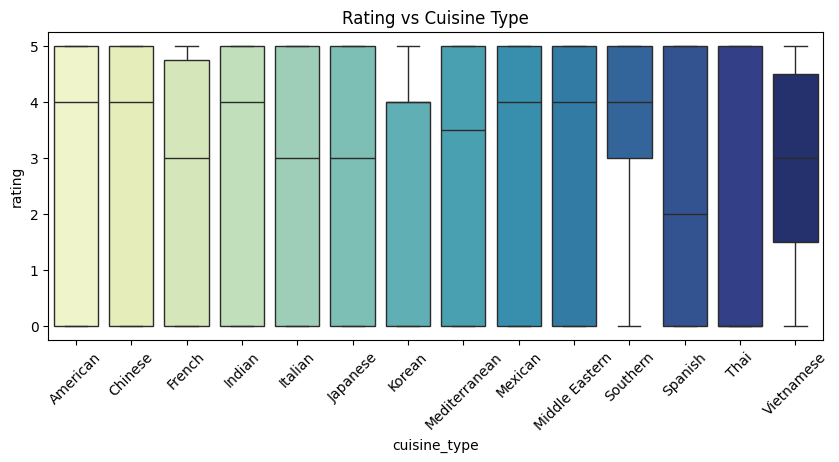


Observations from the boxplots
 - American, Mexican, Indian, Middle Eastern and Chinese have median 4 which indicates higher numbers of 4 and above rating


In [89]:
# Compare rating across different cuisine types
plt.figure(figsize=(10, 4))
sns.boxplot(x='cuisine_type', y='rating', data=food_hub, hue='cuisine_type', palette = 'YlGnBu')
plt.title('Rating vs Cuisine Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print('\nObservations from the boxplots')
print(' - American, Mexican, Indian, Middle Eastern and Chinese have median 4 which indicates higher numbers of 4 and above rating')

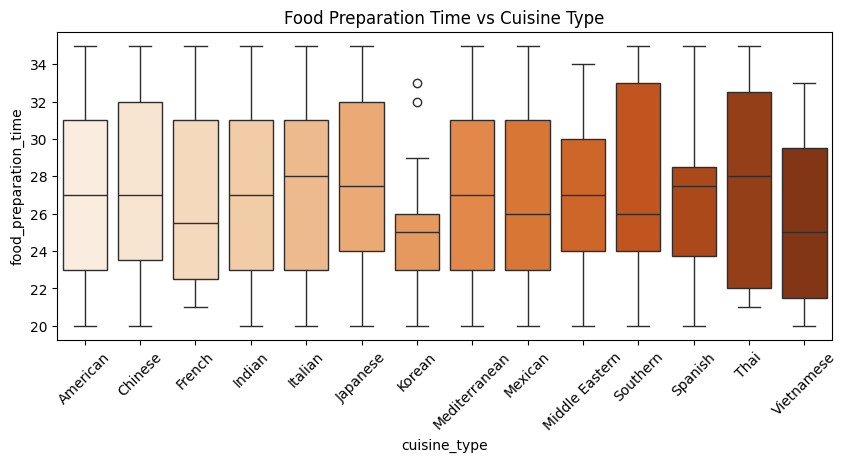


Observations from the boxplots
 - Korean, Spanish, Middle eastern, Viernamese food usally gets cooked quicker
 - Italian, Thai, Japanese have higher median cooking time indicating most food takes longer to prepare.


In [90]:
# Compare Food Preparation Time across different cuisine types
plt.figure(figsize=(10, 4))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=food_hub, hue='cuisine_type', palette = 'Oranges')
plt.title('Food Preparation Time vs Cuisine Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print('\nObservations from the boxplots')
print(' - Korean, Spanish, Middle eastern, Viernamese food usally gets cooked quicker')
print(' - Italian, Thai, Japanese have higher median cooking time indicating most food takes longer to prepare.')

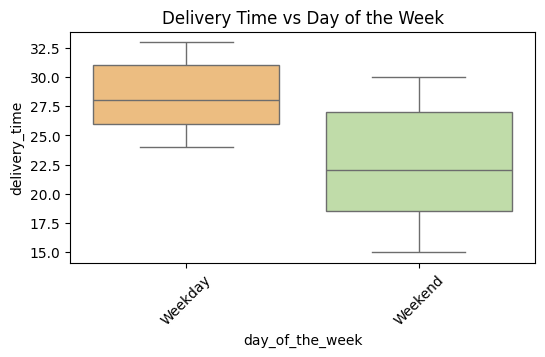


Observations from the boxplots
 - Weekdays have higher median delivery time which indicates slower delivery
 - Weekends have lower median delivery and also the data is evenly distributed with range much lower than Weekdays


In [88]:
# Compare delivery times on weekdays vs weekends
plt.figure(figsize=(6, 3))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=food_hub, hue='day_of_the_week', palette='Spectral')
plt.title('Delivery Time vs Day of the Week')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print('\nObservations from the boxplots')
print(' - Weekdays have higher median delivery time which indicates slower delivery')
print(' - Weekends have lower median delivery and also the data is evenly distributed with range much lower than Weekdays')

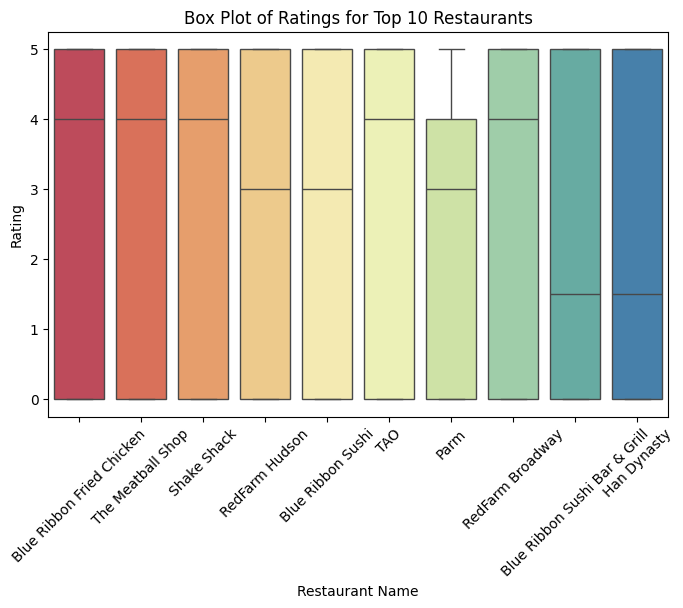

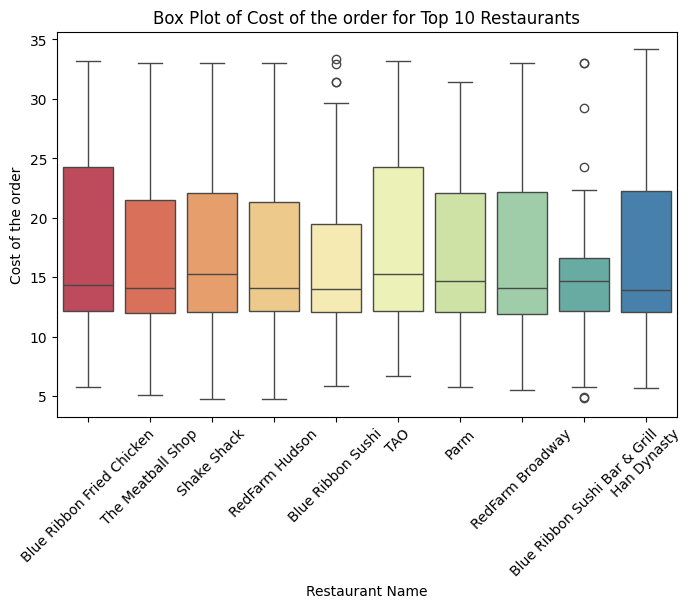


Observations from the boxplots
 - Most restaurants have a median rating of 4 or higher, reflecting positive customer feedback.
 - Restaurants such as RedFarm Broadway and Han Dynasty, show lower median rating indicating majority 
 customer not happy with the food but reason for higher order volume could be due to factors like cost as observed 
 for Redfarm Boardway from the Cost of the order vs Restaurant box plot


In [91]:
# Compare ratings vs top 10 most ordered retaurant

# Identify the top 10 most popular restaurants based on the number of orders
top_10_restaurants = food_hub['restaurant_name'].value_counts().head(10).index
# Filter data for only the top 10 restaurants
top_10_data = food_hub[food_hub['restaurant_name'].isin(top_10_restaurants)]

# Create a boxplot for Ratings vs. Restaurant Name
plt.figure(figsize=(8, 5))
sns.boxplot(x='restaurant_name', y='rating', data=top_10_data, hue='restaurant_name', palette= 'Spectral')
plt.title('Box Plot of Ratings for Top 10 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# Create a boxplot for Cost of the order vs. Top 10 Restaurant Name
plt.figure(figsize=(8, 5))
sns.boxplot(x='restaurant_name', y='cost_of_the_order', data=top_10_data, hue='restaurant_name', palette= 'Spectral')
plt.title('Box Plot of Cost of the order for Top 10 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Cost of the order')
plt.xticks(rotation=45)
plt.show()

print('\nObservations from the boxplots')
print(' - Most restaurants have a median rating of 4 or higher, reflecting positive customer feedback.')
print(' - Restaurants such as RedFarm Broadway and Han Dynasty, show lower median rating indicating majority \n customer not happy with the food but reason for higher order volume could be due to factors like cost as observed \n for Redfarm Boardway from the Cost of the order vs Restaurant box plot')


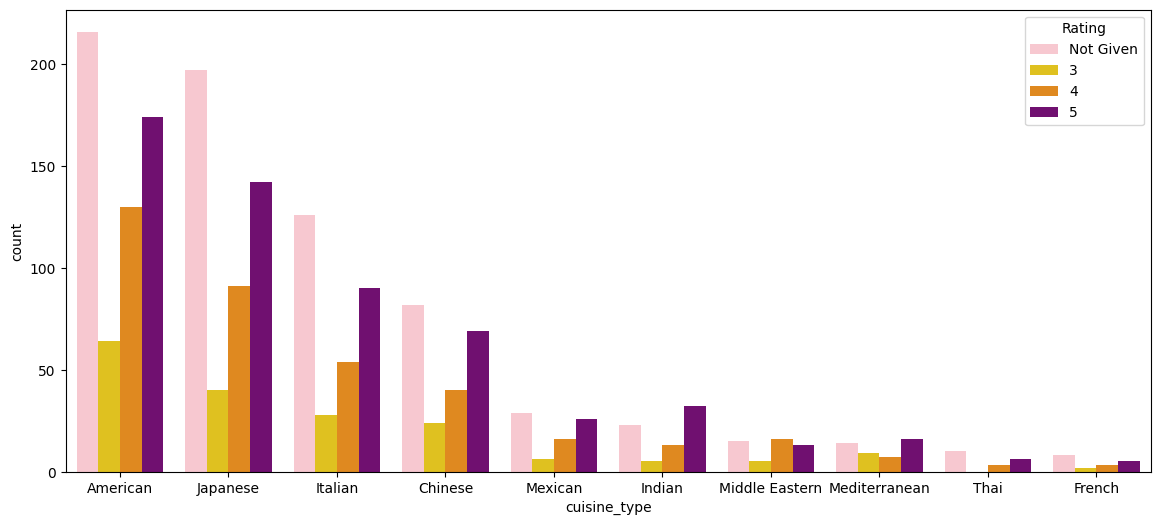


Observations from the countplot
 - Cuisine types American, Japanese, Italian, and Chinese are the top 4 highly rated


In [63]:
# Compare ratings vs across all cuisine types
plt.figure(figsize = (14,6))
sns.countplot(data = food_hub, x = 'cuisine_type', hue = 'rating', order = food_hub['cuisine_type'].value_counts().iloc[:10].index, palette = ['#FFC0CB', '#FFD700', '#FF8C00', '#800080'])
plt.legend(title='Rating', loc='upper right', labels=['Not Given','3','4','5']);
plt.show()
print('\nObservations from the countplot')
print(' - Cuisine types American, Japanese, Italian, and Chinese are the top 4 highly rated')



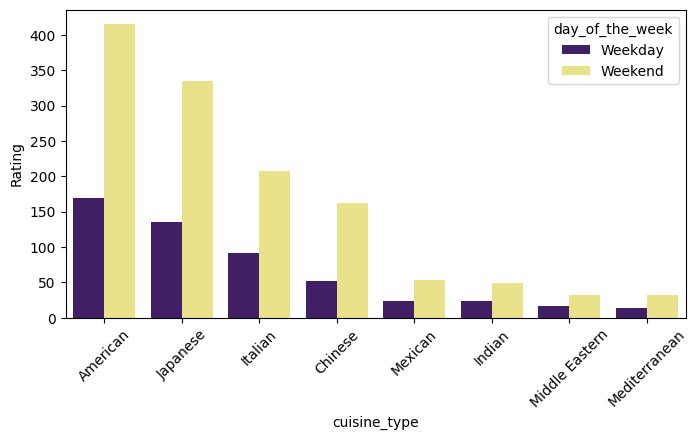


Observations from the countplot
 - Day of the week has no influence over customer choice of cuisine type.
 - American, Japanese, Italian, and Chinese cuisine are the popular throughout the entire week.


In [57]:
plt.figure(figsize = (8,4))
sns.countplot(data = food_hub, x = 'cuisine_type', hue = 'day_of_the_week', order = food_hub.cuisine_type.value_counts().iloc[:8].index, palette=['#411371',"#FAEE7B"])
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

print('\nObservations from the countplot')
print(' - Day of the week has no influence over customer choice of cuisine type.')
print(' - American, Japanese, Italian, and Chinese cuisine are the popular throughout the entire week.')


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [58]:
# Create a copy of the 'rating' and 'restaurant_name' columns from the 'food_hub' DataFrame
food_rating = food_hub[['rating', 'restaurant_name']].copy()
# Replace 'Not given' ratings with 0 so convert it to int
food_rating['rating'] = food_rating['rating'].replace('Not given', 0)
# Convert the 'rating' column to integer type for numerical operations
food_rating['rating'] = food_rating['rating'].astype(int)
# Filter the DataFrame to include only data with rating>4
food_rating = food_rating[food_rating['rating'] > 4]
# Group the data by 'restaurant_name' and get the count or rating
rating_counts = food_rating.groupby('restaurant_name')['rating'].count().sort_values(ascending=False)
# Filter the grouped data to include only restaurants with more than 50 ratings
rating_counts_filtered = rating_counts[rating_counts > 50]

# Print the filtered list of restaurants and their rating counts
print(rating_counts_filtered)

restaurant_name
Shake Shack          60
The Meatball Shop    53
Name: rating, dtype: int64


#### Observations:
Shake Shack:	60  
The Meatball Shop:	53

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [59]:
# Define a function to calculate revenue based on the price of an order
def calculate_revenue(price):
    # If the price is greater than 20, calculate revenue as 25% of the price
    if price > 20:
        return price * 0.25
    # If the price is between 5 and 20, calculate revenue as 15% of the price
    elif price > 5:
        return price * 0.15
    # If the price is 5 or less, no revenue is generated
    else:
        return 0

# Call the 'calculate_revenue' function to each 'cost_of_the_order' column
# and store the results in a new column called 'company_revenue'
food_hub['company_revenue'] = food_hub['cost_of_the_order'].apply(calculate_revenue)

# Calculate the total revenue by summing up all values in the 'company_revenue' column
total_revenue = food_hub['company_revenue'].sum()

# Print the total revenue
print(total_revenue)

6166.303


#### Observations:
The total revenue generated by the company is: $6166.303

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [60]:
# Calculate the total time for each order by adding 'food_preparation_time' and 'delivery_time'
food_hub['total_time'] = food_hub['food_preparation_time'] + food_hub['delivery_time']

# Count the number of orders where the total time exceeds 60 minutes
count_sixty_min = (food_hub['total_time'] > 60).sum()

# Get the total number of orders in the dataset
total_count = food_hub['total_time'].count()

# Calculate the percentage of orders that take more than 60 minutes
percentage = count_sixty_min / total_count * 100

# Print the calculated percentage
print(percentage)

10.537407797681771


#### Observations:
Approximately 10.537% of food takes more than 60 min from ordering to delivery.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [61]:
# Count the occurrences of each unique value in the 'day_of_the_week' column
food_hub['day_of_the_week'].value_counts()

# Filter the DataFrame to include only orders placed on weekdays
food_hub_weekday = food_hub[food_hub['day_of_the_week'] == 'Weekday']

# Filter the DataFrame to include only orders placed on weekends
food_hub_weekend = food_hub[food_hub['day_of_the_week'] == 'Weekend']

# Calculate and print the average delivery time for orders placed on weekdays
print(food_hub_weekday['delivery_time'].mean())

# Calculate and print the average delivery time for orders placed on weekends
print(food_hub_weekend['delivery_time'].mean())

28.340036563071298
22.4700222057735


#### Observations:
Mean delivery time on weekdays: 28.34 min  
Mean delivery time on weekends: 22.47 min  
This indicates that the mean delivery time is quicker on weekdays compare to weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Strong correlation missing between numerical data i.e  cost_of_the_order, food_preparation_time, delivery_time and rating.
*  A significant portion of ratings is "Not given" (736 counts), followed by 5-star ratings (588 counts).
*  Most ordered restuarants are consistantly getting higher ratings
*  A majority of orders occur on weekends (1351 orders), compared to weekdays (547 orders).
*  Order counts are unevenly distributed while American, Chinese, Japanese, Italian received majority of the orders. Vietnamese, Thai, Southern, French, Korean, Spanish receive significantly less order.
*  Weekday delivery is slower even though volume is less.
* Spanish, Thai, Korean cuisine have higher count of lower rating which indicantes some issue with the restaurant serving these cuisines.



### Recommendations:

*  Implement loyalty programs for frequent customers to boost repeat business and improve overall ratings
*   Incentivize the ratings system to caputure more ratings
*   Frequent followup with customer to complete the reviews and ratings
*   Implement more direct delivery during weekdays focussing around the peak time
*   Incentivize the delivery drivers to support during weekends as well to improve delivery time further.
*   Optimize delivery routes using mapping software.
*   The orders are heavily skewed toward few types of cuisine which undermines the other businesses. Recommendation is the launch some offers on the non-frequent business types.
*   Work directly with the bottom 10 restaurant to understand the issues and challenges and address them accordingly.
*   Analyse the root cuase of more low ratings and incentivize the restaurant to improve quality of food.







---